In [18]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import researchpy as rp

kuuluvus20 = pd.read_csv("kuuluvus2020.csv", encoding='latin-1')

kuuluvus20 = kuuluvus20.replace("Nõustun täielikult", 5)
kuuluvus20 = kuuluvus20.replace("Pigem nõustun", 4)
kuuluvus20 = kuuluvus20.replace("Ei oska öelda", 3)
kuuluvus20 = kuuluvus20.replace("Pigem ei nõustu", 2)
kuuluvus20 = kuuluvus20.replace("Ei nõustu üldse", 1)


kuuluvus20['kohmakasReverse'] = kuuluvus20.apply(lambda row: abs(row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end koolis kohmaka ja kohatuna.]"]-6), axis=1)
kuuluvus20['yksikReverse'] = kuuluvus20.apply(lambda row: abs(row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis üksikuna.]"]-6), axis=1)
kuuluvus20['torjutudReverse'] = kuuluvus20.apply(lambda row: abs(row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis tõrjutuna.]"]-6), axis=1)

kuuluvus20['kuuluvusskoor'] = kuuluvus20.apply(lambda row: row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian, et teised peavad minust lugu.]"]
                                               + row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian kergesti sõpru.]"] 
                                               + row["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen, et olen osa sellest kursusest.]"] 
                                               + row.kohmakasReverse 
                                               + row.yksikReverse 
                                               + row.torjutudReverse, axis=1)


In [20]:
kuuluvus22 = pd.read_csv("kuuluvus2022.csv", encoding='latin-1')

kuuluvus22.dropna()
kuuluvus22 = kuuluvus22[kuuluvus22["Column9"] != "{question_not_shown}"]
kuuluvus22 = kuuluvus22.drop(0)
kuuluvus22 = kuuluvus22.drop(1)
kuuluvus22 = kuuluvus22.drop(455)

kuuluvus22 = kuuluvus22.replace("5", 5)
kuuluvus22 = kuuluvus22.replace("4", 4)
kuuluvus22 = kuuluvus22.replace("3", 3)
kuuluvus22 = kuuluvus22.replace("2", 2)
kuuluvus22 = kuuluvus22.replace("1", 1)

kuuluvus22['Column12reverse'] = kuuluvus22.apply(lambda row: abs(row.Column12-6), axis=1)
kuuluvus22['Column13reverse'] = kuuluvus22.apply(lambda row: abs(row.Column13-6), axis=1)
kuuluvus22['Column14reverse'] = kuuluvus22.apply(lambda row: abs(row.Column14-6), axis=1)

kuuluvus22['kuuluvusskoor'] = kuuluvus22.apply(lambda row: row.Column9 + row.Column10 + row.Column11 + row.Column12reverse + row.Column13reverse + row.Column14reverse, axis=1)


[Text(0.5, 0, 'kuuluvusskoor'), Text(0, 0.5, 'arv')]

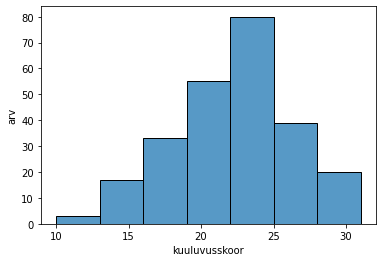

In [21]:
import seaborn as sns
ax = sns.histplot(data=kuuluvus22["kuuluvusskoor"], binwidth = 3) 
ax.set(xlabel='kuuluvusskoor', ylabel='arv')

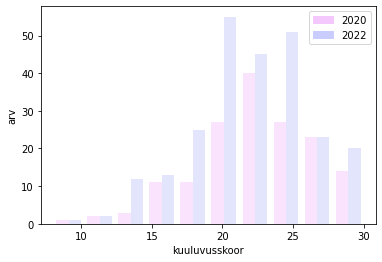

In [22]:
import matplotlib.pyplot as plt
plt.hist([kuuluvus20["kuuluvusskoor"], kuuluvus22["kuuluvusskoor"]], color=['#F4C8FD','#C8CDFD'], alpha=0.5)
plt.ylabel("arv")
plt.xlabel("kuuluvusskoor")

# Graafiku legendi moodustamine https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
varvid = {'2020':'#F4C8FD', '2022':'#C8CDFD'}         
tingimused = list(varvid.keys())
kastid = [plt.Rectangle((0,0),1,1, color=varvid[tingimus]) for tingimus in tingimused]
plt.legend(kastid, tingimused)

<AxesSubplot:ylabel='Frequency'>

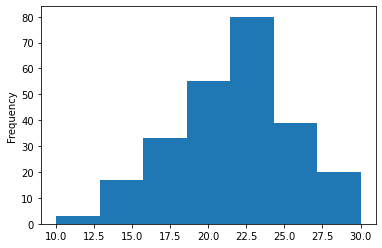

In [23]:
pd.to_numeric(kuuluvus22["kuuluvusskoor"], errors='coerce').plot.hist(bins=7)

In [24]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian, et teised peavad minust lugu.]"].mean())
print(kuuluvus22["Column9"].mean())

3.8176100628930816
3.769230769230769


In [25]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian kergesti sõpru.]"].mean())
print(kuuluvus22["Column10"].mean())

3.1446540880503147
3.1376518218623484


In [26]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen, et olen osa sellest kursusest.]"].mean())
print(kuuluvus22["Column11"].mean())

3.4654088050314464
3.3157894736842106


In [27]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end koolis kohmaka ja kohatuna.]"].mean())
print(kuuluvus22["Column12"].mean())

2.207547169811321
2.3724696356275303


In [28]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis üksikuna.]"].mean())
print(kuuluvus22["Column13"].mean())

2.40251572327044
2.45748987854251


In [29]:
print(kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis tõrjutuna.]"].mean())
print(kuuluvus22["Column14"].mean())

1.471698113207547
1.4939271255060729


In [30]:
print("2020 aasta:")
print(kuuluvus20["kuuluvusskoor"].mean())
print("2022 aasta:")
print(kuuluvus22["kuuluvusskoor"].mean())

2020 aasta:
22.345911949685533
2022 aasta:
21.898785425101213


In [31]:
summary, results = rp.ttest(group1= kuuluvus20["kuuluvusskoor"], group1_name= "2020 kuuluvus",
                            group2= kuuluvus22["kuuluvusskoor"], group2_name= "2022 kuuluvus")
print(summary)
print(results)

        Variable      N       Mean        SD        SE  95% Conf.   Interval
0  2020 kuuluvus  159.0  22.345912  4.096907  0.324906  21.704193  22.987631
1  2022 kuuluvus  247.0  21.898785  4.150849  0.264112  21.378576  22.418995
2       combined  406.0  22.073892  4.130520  0.204994  21.670906  22.476877
                              Independent t-test   results
0  Difference (2020 kuuluvus - 2022 kuuluvus) =     0.4471
1                          Degrees of freedom =   404.0000
2                                           t =     1.0648
3                       Two side test p value =     0.2876
4                      Difference < 0 p value =     0.8562
5                      Difference > 0 p value =     0.1438
6                                   Cohen's d =     0.1083
7                                   Hedge's g =     0.1081
8                              Glass's delta1 =     0.1091
9                            Point-Biserial r =     0.0529


# Ma leian, et teised peavad minust lugu.

<AxesSubplot:>

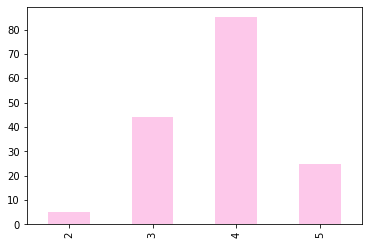

In [32]:
kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian, et teised peavad minust lugu.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

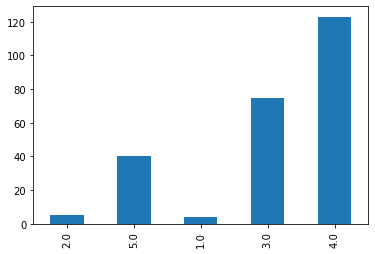

In [33]:
kuuluvus22["Column9"].value_counts(sort=False, normalize=False).plot(kind='bar')

# Ma leian kergesti sõpru.

<AxesSubplot:>

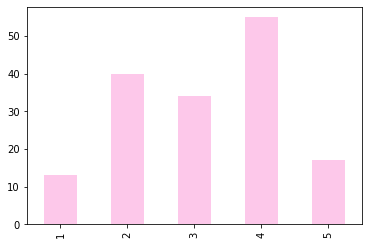

In [34]:
kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma leian kergesti sõpru.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

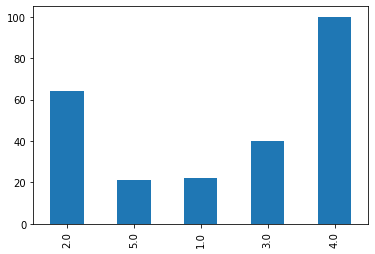

In [35]:
kuuluvus22["Column10"].value_counts(sort=False, normalize=False).plot(kind='bar')

# Ma tunnen, et olen osa sellest kursusest.

<AxesSubplot:>

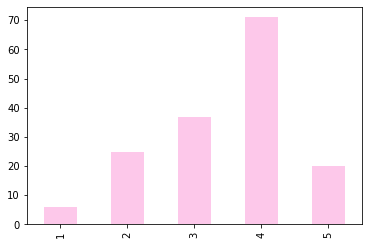

In [36]:
kuuluvus20[ "Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen, et olen osa sellest kursusest.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

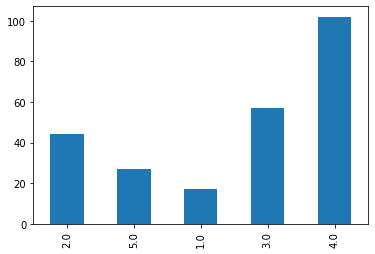

In [37]:
kuuluvus22["Column11"].value_counts(sort=False, normalize=False).plot(kind='bar')

# Ma tunnen end koolis kohmaka ja kohatuna.

<AxesSubplot:>

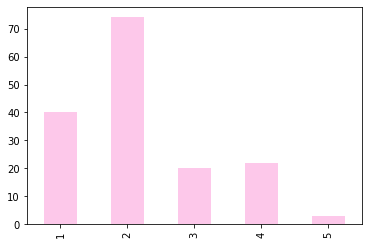

In [38]:
kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end koolis kohmaka ja kohatuna.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

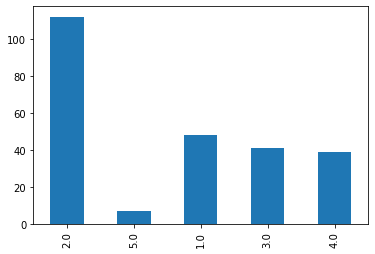

In [39]:
kuuluvus22["Column12"].value_counts(sort=False, normalize=False).plot(kind='bar')

# Ma tunnen end ülikoolis üksikuna.

<AxesSubplot:>

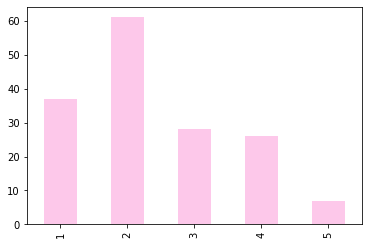

In [40]:
kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis üksikuna.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

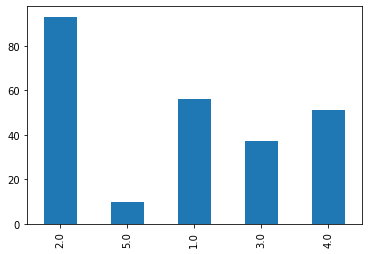

In [41]:
kuuluvus22["Column13"].value_counts(sort=False, normalize=False).plot(kind='bar')

# Ma tunnen end ülikoolis tõrjutuna.

<AxesSubplot:>

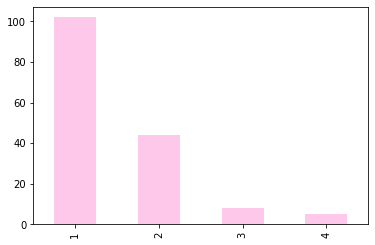

In [42]:
kuuluvus20["Palun märgi, mil määral nõustud järgnevate väidetega. [Ma tunnen end ülikoolis tõrjutuna.]"].value_counts(sort=False, normalize=False).plot(kind='bar', color='#FDC8EA')

<AxesSubplot:>

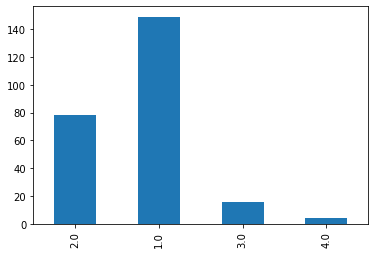

In [43]:
kuuluvus22["Column14"].value_counts(sort=False, normalize=False).plot(kind='bar')